In [1]:
import sys
from pathlib import Path

MAIN_PATH = Path('..').resolve()
sys.path.append(str(MAIN_PATH))
CONSTANTS_PATH = MAIN_PATH / 'CONSTANT.json'


In [2]:
import numpy as np
from PIL import Image

from datasets.dataset import load_dataset
from image_processings.image_pre_seg import image_i_segment
from metrics.visualize import show_original_and_slic


In [3]:
idx = 2
name_list = ['original', 'dataset_v0', 'cropped']
name = name_list[idx]

img_list, mask_list = load_dataset(name)


In [4]:
seg_class = image_i_segment(image=img_list[0])


SLIC 标签统计 -> min: 1, max: 46, unique_count: 46


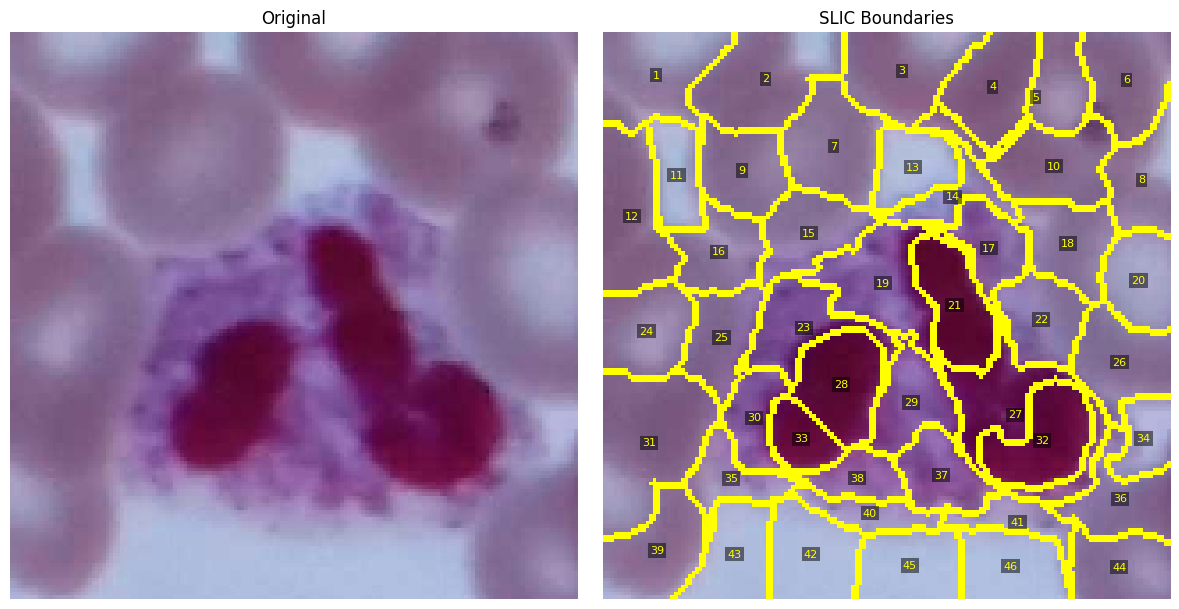

{'label_min': 1, 'label_max': 46, 'unique_count': 46}


In [5]:
fig, axes, slic_stats = show_original_and_slic(img_list[0], seg_class.segment_without_padding)
print(slic_stats)


In [6]:
slic_np = seg_class.segment_without_padding.detach().cpu().numpy()
print('segment shape:', slic_np.shape)
print('segment dtype:', slic_np.dtype)
print('segment min:', slic_np.min(), 'max:', slic_np.max())
print('unique labels count:', np.unique(slic_np).size)
unique_labels = np.unique(slic_np)
print('first 10 labels:', unique_labels[:10])
print('last 10 labels:', unique_labels[-10:])


segment shape: (260, 260)
segment dtype: int64
segment min: 1 max: 46
unique labels count: 46
first 10 labels: [ 1  2  3  4  5  6  7  8  9 10]
last 10 labels: [37 38 39 40 41 42 43 44 45 46]


In [7]:
graph_nodes = sorted(seg_class.graph.nodes())
print('graph node count:', len(graph_nodes))
print('graph node min:', graph_nodes[0], 'max:', graph_nodes[-1])
print('first 10 nodes:', graph_nodes[:10])
print('last 10 nodes:', graph_nodes[-10:])
print('contains node 0:', 0 in graph_nodes)
print('contains node 1:', 1 in graph_nodes)


graph node count: 48
graph node min: 0 max: 47
first 10 nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
last 10 nodes: [38, 39, 40, 41, 42, 43, 44, 45, 46, 47]
contains node 0: True
contains node 1: True
